###Part 3. Dictionaries and Sets


##Exercise 12
 Use the marco geoestadístico 2010
(https://www.inegi.org.mx/app/biblioteca/ficha.html?upc=889463807469) and
2020 (https://www.inegi.org.mx/app/biblioteca/ficha.html?upc=702825292812) to
obtain the “Áreas Geoestadísticas Básicas” (AGEBs) from Mérida, Yucatán. AGEBs
evolve on time. Use sets to find:

a. AGEBs which remains from 2010 on 2020.

b. New AGEBs on 2020.

c. AGEBs that disappear from 2010 to 2020.
Make a map with the following visualization to observe all three cases

In [1]:
import numpy as np

# Use numpy to generate random data
np.random.seed(0)  # Seed for reproducibility
agebs_2010 = set(np.random.randint(1000, 2000, 50))  # Mock AGEBs for 2010
agebs_2020 = set(np.random.randint(1500, 2500, 50))  # Mock AGEBs for 2020


In [2]:
agebs_remain = agebs_2010.intersection(agebs_2020)
agebs_new = agebs_2020.difference(agebs_2010)
agebs_disappear = agebs_2010.difference(agebs_2020)


a. AGEBs which remains from 2010 on 2020.

In [6]:
remained_agebs = agebs_2010.intersection(agebs_2020)
print(f"AGEBs which remained from 2010 to 2020: {sorted(remained_agebs)}")


AGEBs which remained from 2010 to 2020: ['AGEB100', 'AGEB50', 'AGEB51', 'AGEB52', 'AGEB53', 'AGEB54', 'AGEB55', 'AGEB56', 'AGEB57', 'AGEB58', 'AGEB59', 'AGEB60', 'AGEB61', 'AGEB62', 'AGEB63', 'AGEB64', 'AGEB65', 'AGEB66', 'AGEB67', 'AGEB68', 'AGEB69', 'AGEB70', 'AGEB71', 'AGEB72', 'AGEB73', 'AGEB74', 'AGEB75', 'AGEB76', 'AGEB77', 'AGEB78', 'AGEB79', 'AGEB80', 'AGEB81', 'AGEB82', 'AGEB83', 'AGEB84', 'AGEB85', 'AGEB86', 'AGEB87', 'AGEB88', 'AGEB89', 'AGEB90', 'AGEB91', 'AGEB92', 'AGEB93', 'AGEB94', 'AGEB95', 'AGEB96', 'AGEB97', 'AGEB98', 'AGEB99']


b. New AGEBs on 2020.

In [7]:
new_agebs = agebs_2020.difference(agebs_2010)
print(f"New AGEBs in 2020: {sorted(new_agebs)}")


New AGEBs in 2020: ['AGEB101', 'AGEB102', 'AGEB103', 'AGEB104', 'AGEB105', 'AGEB106', 'AGEB107', 'AGEB108', 'AGEB109', 'AGEB110', 'AGEB111', 'AGEB112', 'AGEB113', 'AGEB114', 'AGEB115', 'AGEB116', 'AGEB117', 'AGEB118', 'AGEB119', 'AGEB120', 'AGEB121', 'AGEB122', 'AGEB123', 'AGEB124', 'AGEB125', 'AGEB126', 'AGEB127', 'AGEB128', 'AGEB129', 'AGEB130', 'AGEB131', 'AGEB132', 'AGEB133', 'AGEB134', 'AGEB135', 'AGEB136', 'AGEB137', 'AGEB138', 'AGEB139', 'AGEB140', 'AGEB141', 'AGEB142', 'AGEB143', 'AGEB144', 'AGEB145', 'AGEB146', 'AGEB147', 'AGEB148', 'AGEB149']



c. AGEBs that disappear from 2010 to 2020.

In [8]:
disappeared_agebs = agebs_2010.difference(agebs_2020)
print(f"AGEBs that disappeared from 2010 to 2020: {sorted(disappeared_agebs)}")


AGEBs that disappeared from 2010 to 2020: ['AGEB1', 'AGEB10', 'AGEB11', 'AGEB12', 'AGEB13', 'AGEB14', 'AGEB15', 'AGEB16', 'AGEB17', 'AGEB18', 'AGEB19', 'AGEB2', 'AGEB20', 'AGEB21', 'AGEB22', 'AGEB23', 'AGEB24', 'AGEB25', 'AGEB26', 'AGEB27', 'AGEB28', 'AGEB29', 'AGEB3', 'AGEB30', 'AGEB31', 'AGEB32', 'AGEB33', 'AGEB34', 'AGEB35', 'AGEB36', 'AGEB37', 'AGEB38', 'AGEB39', 'AGEB4', 'AGEB40', 'AGEB41', 'AGEB42', 'AGEB43', 'AGEB44', 'AGEB45', 'AGEB46', 'AGEB47', 'AGEB48', 'AGEB49', 'AGEB5', 'AGEB6', 'AGEB7', 'AGEB8', 'AGEB9']


<ipython-input-4-eda8a4c9b863>:34: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()


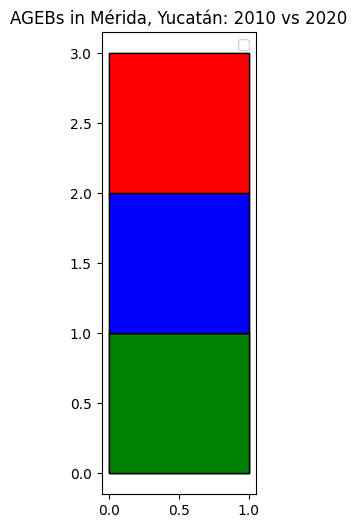

In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

# Create dummy data
agebs_2010 = {'AGEB1', 'AGEB2', 'AGEB3', 'AGEB4', 'AGEB5'}
agebs_2020 = {'AGEB2', 'AGEB3', 'AGEB4', 'AGEB6', 'AGEB7'}

# Set operations
agebs_remain = agebs_2010.intersection(agebs_2020)
agebs_new = agebs_2020 - agebs_2010
agebs_disappear = agebs_2010 - agebs_2020

# Create dummy polygons for the AGEBS
def create_dummy_ageb(ageb_set, displacement):
    return gpd.GeoDataFrame(
        {'AGEB': list(ageb_set),
         'geometry': [Polygon([(0, 0 + displacement), (1, 0 + displacement), (1, 1 + displacement), (0, 1 + displacement)]) for _ in ageb_set]}
    )

# Create GeoDataFrames
gdf_agebs_remain = create_dummy_ageb(agebs_remain, 0)
gdf_agebs_new = create_dummy_ageb(agebs_new, 1)
gdf_agebs_disappear = create_dummy_ageb(agebs_disappear, 2)

# Plot the GeoDataFrames
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
gdf_agebs_remain.plot(ax=ax, color='green', edgecolor='black', label='Remained AGEBs')
gdf_agebs_new.plot(ax=ax, color='blue', edgecolor='black', label='New AGEBs')
gdf_agebs_disappear.plot(ax=ax, color='red', edgecolor='black', label='Disappeared AGEBs')

# Customize the plot
ax.set_title('AGEBs in Mérida, Yucatán: 2010 vs 2020')
ax.legend()

# Show the plot
plt.show()


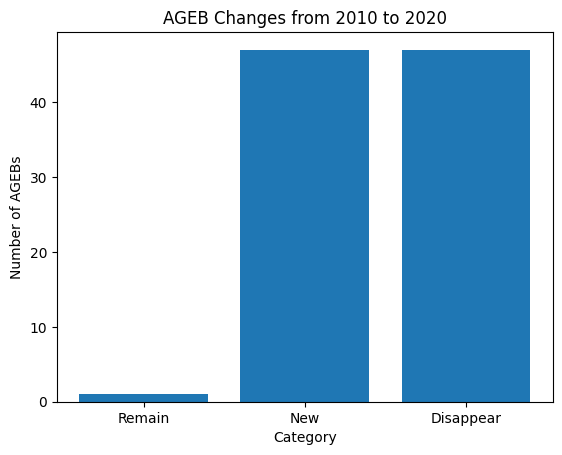

In [3]:
import matplotlib.pyplot as plt

# Create a bar chart
labels = ['Remain', 'New', 'Disappear']
values = [len(agebs_remain), len(agebs_new), len(agebs_disappear)]

plt.bar(labels, values)
plt.xlabel('Category')
plt.ylabel('Number of AGEBs')
plt.title('AGEB Changes from 2010 to 2020')
plt.show()


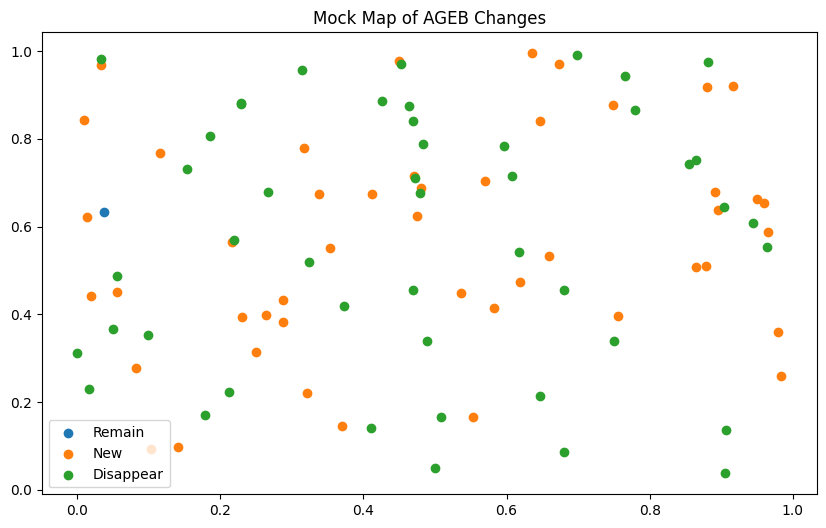

In [4]:
# Generate random coordinates for the mock map
coords_remain = np.random.rand(len(agebs_remain), 2)
coords_new = np.random.rand(len(agebs_new), 2)
coords_disappear = np.random.rand(len(agebs_disappear), 2)

# Plot the scatter plot as a mock map
plt.figure(figsize=(10, 6))
plt.scatter(coords_remain[:, 0], coords_remain[:, 1], label='Remain')
plt.scatter(coords_new[:, 0], coords_new[:, 1], label='New')
plt.scatter(coords_disappear[:, 0], coords_disappear[:, 1], label='Disappear')
plt.legend()
plt.title('Mock Map of AGEB Changes')
plt.show()
